#Walkthrough


1.   Importing Data
2.   Cleaning Data
3.   Loading Data
4.   Training Models
5.   Evaluation of different Models
6.   Conclusion


**Dependencies**
*   Pandas - To read the CSV file
*   Numpy - Perform calculations on data
*   Scikit learn - Build the predictive models
*   Matplotlib - Visualise the output



# Importing DATA

In [ ]:
import pandas as pd

url = 'https://raw.githubusercontent.com/Stealth137/oink.../master/EOD-MSFT.csv'
df = pd.read_csv(url)

In [ ]:
print(df)

            Date     Open     High  ...    Adj_Low  Adj_Close   Adj_Volume
0     2017-12-28  85.9000  85.9300  ...  82.490610  82.654531   10594344.0
1     2017-12-27  85.6500  85.9800  ...  82.167590  82.644889   14678025.0
2     2017-12-26  85.3100  85.5346  ...  81.989206  82.345975    9891237.0
3     2017-12-22  85.4000  85.6300  ...  81.883140  82.452041   14145841.0
4     2017-12-21  86.0500  86.1000  ...  82.345975  82.442398   17990745.0
...          ...      ...      ...  ...        ...        ...          ...
1085  2013-09-09  31.2208  31.7900  ...  26.942379  27.335289   49628500.0
1086  2013-09-06  31.3100  31.3900  ...  26.881931  26.900929   75434900.0
1087  2013-09-05  31.1000  31.4400  ...  26.726495  26.972603   71644900.0
1088  2013-09-04  31.3900  31.4700  ...  26.864661  26.938061  142320600.0
1089  2013-09-03  31.7500  32.0700  ...  27.020097  27.529585  154507000.0

[1090 rows x 13 columns]


# Cleaning data

In [ ]:
dataFrame = df.copy()

# drop Dividend : since for almost all rows Dividend = 0
# drop Split : since for almost all rows Split = 1
# drop Adjusted values
dataFrame.drop(["Dividend","Split","Adj_Open","Adj_High","Adj_Low","Adj_Close","Adj_Volume"], axis = 1, inplace = True)

In [ ]:
# dropping '-' from Date
rows = dataFrame.values.tolist()
for row in rows:
  row[0]=int(''.join(row[0].split('-')))

In [ ]:
# Normalising 'Volume'

maxVolume = 0
# meanVolume = 0
for row in rows:
  if maxVolume < row[-1] :
    maxVolume = row[-1]
  # meanVolume += row[-1]
# meanVolume /= len(rows)

for row in rows:
  # row[-1] = (row[-1] - meanVolume)/maxVolume
  row[-1] = (row[-1])/maxVolume

In [ ]:
# inserting Date and Volume w/ new format
tempDate = []
tempVolume = []
dataFrame.pop('Date')
dataFrame.pop('Volume')
for i in range(len(rows)) :
  tempDate.append(rows[i][0])
  tempVolume.append(rows[i][-1])
dataFrame['Date'] = tempDate
dataFrame['Volume'] = tempVolume
dataFrame = pd.DataFrame(dataFrame,columns=['Date','Open','High','Low','Close','Volume'])

In [ ]:
print(dataFrame)

          Date     Open     High     Low   Close    Volume
0     20171228  85.9000  85.9300  85.550  85.720  0.052312
1     20171227  85.6500  85.9800  85.215  85.710  0.072476
2     20171226  85.3100  85.5346  85.030  85.400  0.048840
3     20171222  85.4000  85.6300  84.920  85.510  0.069848
4     20171221  86.0500  86.1000  85.400  85.500  0.088833
...        ...      ...      ...     ...     ...       ...
1085  20130909  31.2208  31.7900  31.200  31.655  0.245052
1086  20130906  31.3100  31.3900  31.130  31.152  0.372477
1087  20130905  31.1000  31.4400  30.950  31.235  0.353763
1088  20130904  31.3900  31.4700  31.110  31.195  0.702740
1089  20130903  31.7500  32.0700  31.290  31.880  0.762913

[1090 rows x 6 columns]


# Loading Data

In [ ]:
x_train = []
y_train = []
x_test = []
y_test = []

X = []
Y = []

In [ ]:
# X is set of features

# X = dataFrame[['Date','Open','High','Low','Close']]
# X = dataFrame[['Date','Open']]
# X = dataFrame[['Open','Close']]
# X = dataFrame[['Date']]
X = dataFrame[['Open']]

# Y is the target

Y = dataFrame['Volume']
# Y = dataFrame['Close']
# Y = dataFrame['High']

In [ ]:
from sklearn.model_selection import train_test_split

# split training and test data
x_train, x_test, y_train, y_test = train_test_split(X,Y,train_size=0.8,test_size=0.2) 

In [ ]:
import numpy as np
# Convert lists into numpy arrays 
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)


In [ ]:
# print("x_train")
# print(x_train)
# print("y_train")
# print(y_train)
# print("x_test")
# print(x_test)
# print("y_test")
# print(y_test)

# Model Training

In [ ]:
# Linear Regression model
from sklearn.linear_model import LinearRegression 
model_lr = LinearRegression()
model_lr.fit(x_train,y_train)
y_pred_lr = model_lr.predict(x_test)
# print(y_test)
# print(y_pred_lr)

# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(n_estimators=100)
model_rf.fit(x_train,y_train)
y_pred_rf = model_rf.predict(x_test)
# print(y_test)
# print(y_pred_rf)

# Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
model_gb = GradientBoostingRegressor(n_estimators=100)
model_gb.fit(x_train,y_train)
y_pred_gb = model_gb.predict(x_test)
# print(y_test)
# print(y_pred_gb)

# Evaluation of Different Models

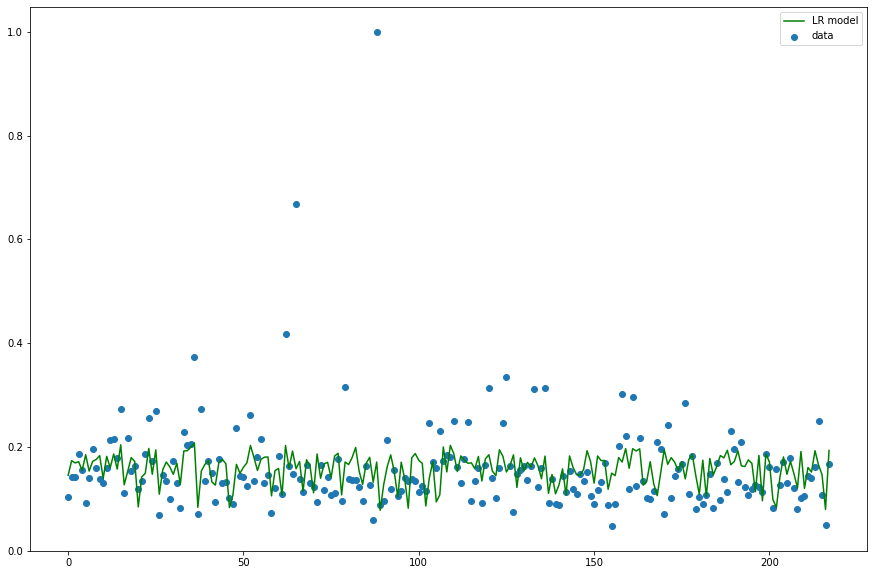

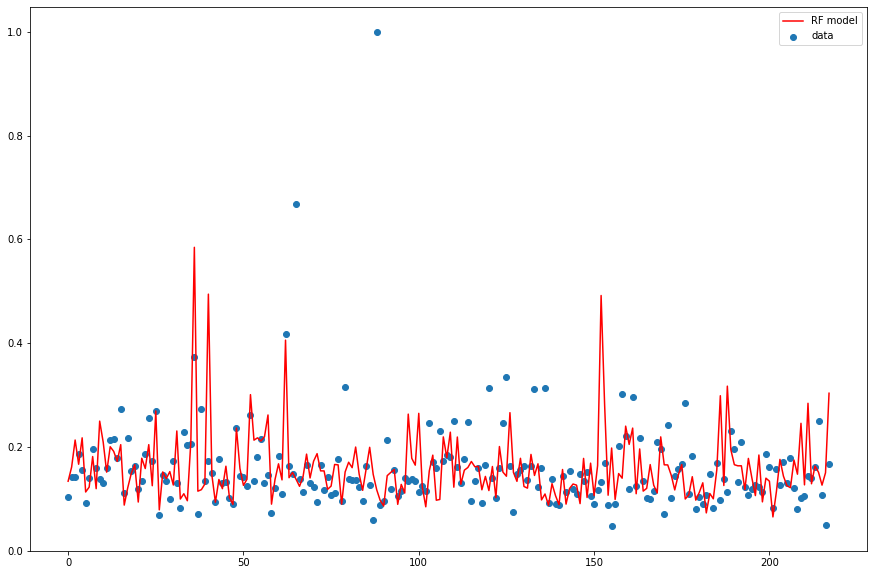

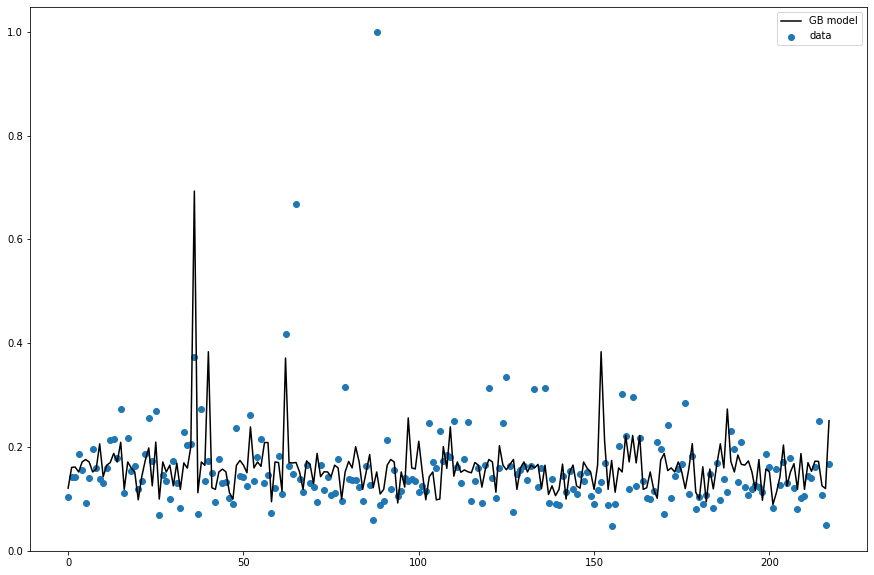

In [ ]:
import matplotlib.pyplot as plt 

# Linear Regression
plt.subplots(figsize=(15,10))
plt.scatter(range(len(y_test)),y_test,label='data')
plt.plot(range(len(y_test)),y_pred_lr,color='green',label='LR model')
plt.legend()

# Random Forest Regressor
plt.subplots(figsize=(15,10))
plt.scatter(range(len(y_test)),y_test,label='data')
plt.plot(range(len(y_test)),y_pred_rf,color='red',label='RF model')
plt.legend()

# Gradient Boosting Regressor
plt.subplots(figsize=(15,10))
plt.scatter(range(len(y_test)),y_test,label='data')
plt.plot(range(len(y_test)),y_pred_gb,color='black',label='GB model')
plt.legend()

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import r2_score
from sklearn.metrics import max_error

from sklearn.metrics import accuracy_score

print("Linear Regression")
print("mean_absolute_error : ", mean_absolute_error(y_test,y_pred_lr))
print("mean_squared_error : ", mean_squared_error(y_test,y_pred_lr))
print("mean_squared_log_error : ", mean_squared_log_error(y_test,y_pred_lr))
print("r2_score : ", r2_score(y_test,y_pred_lr))
print("max_error : ", max_error(y_test,y_pred_lr))
print("Accuracy of Linear Regerssion Model : ", model_lr.score(x_test,y_test))
print()

print("Random Forest Regressor")
print("mean_absolute_error : ", mean_absolute_error(y_test,y_pred_rf))
print("mean_squared_error : ", mean_squared_error(y_test,y_pred_rf))
print("mean_squared_log_error : ", mean_squared_log_error(y_test,y_pred_rf))
print("r2_score : ", r2_score(y_test,y_pred_rf))
print("max_error : ", max_error(y_test,y_pred_rf))
print("Accuracy of Random Forest Model:", model_rf.score(x_test,y_test))
print()

print("Gradient Boosting Regressor")
print("mean_absolute_error : ", mean_absolute_error(y_test,y_pred_gb))
print("mean_squared_error : ", mean_squared_error(y_test,y_pred_gb))
print("mean_squared_log_error : ", mean_squared_log_error(y_test,y_pred_gb))
print("r2_score : ", r2_score(y_test,y_pred_gb))
print("max_error : ", max_error(y_test,y_pred_gb))
print("Accuracy of Gradient Boosting Model:", model_gb.score(x_test,y_test))

Linear Regression
mean_absolute_error :  0.04703488892747425
mean_squared_error :  0.0073116897998703675
mean_squared_log_error :  0.004029967288306455
r2_score :  0.08596852813880063
max_error :  0.8291777815372454
Accuracy of Linear Regerssion Model :  0.08596852813880063

Random Forest Regressor
mean_absolute_error :  0.054804317916675824
mean_squared_error :  0.010216801456633506
mean_squared_log_error :  0.0058505639477104045
r2_score :  -0.27719833974438246
max_error :  0.8826327415559958
Accuracy of Random Forest Model: -0.27719833974438246

Gradient Boosting Regressor
mean_absolute_error :  0.04868137674569773
mean_squared_error :  0.00821787172524302
mean_squared_log_error :  0.004506530749485949
r2_score :  -0.027312918653029428
max_error :  0.848393084841262
Accuracy of Gradient Boosting Model: -0.027312918653029428


# Done!!! -_- perhaps..........
Add any vote of thank comments :)

For 'Volume' of stocks traded on a test day, Linear Regression seems preferable. 

**WE DO NOT HAVE A BETTER CONCLUSION :)**

**Do enlighten us!!** 